In [8]:
#Step 1: Import modules

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
# Step 2: Import database
dataset = pd.read_csv('ex2data1.txt', header = None, names = ['exam score 1', 'exam score 2', 'result'])
dataset.head()

,exam score 1,exam score 2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
x = dataset['exam score 1']
y = dataset['exam score 2']
pos = dataset['result'] == 1
neg = dataset['result'] == 0


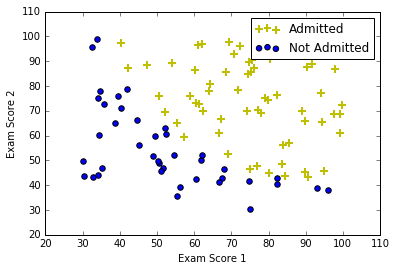

In [4]:
# Step 3: Visualize Data
a = plt.scatter(dataset[pos]['exam score 1'],dataset[pos]['exam score 2'], marker = '+', c = 'y', linewidth = 2, s=60, label='Admitted')
b = plt.scatter(dataset[neg]['exam score 1'],dataset[neg]['exam score 2'], c = 'b', linewidth = 1, s=30, label = 'Not Admitted')
plt.xlabel('Exam Score 1')
plt.ylabel('Exam Score 2')
plt.legend()

In [5]:
# Step 4: manipulate data for use. 
X = dataset.drop(['result'], axis=1)
Y = dataset['result']

X = X.values # 100 x 2 array
Y = Y.values # 1 x 100 array

In [6]:
# Step 5: Fit with Scikit-learn Logistic Regression
regr = SVC(kernel = 'linear')
regr.fit(X,Y) #magic


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
#Accuracy
regr.score(X,Y)


0.91000000000000003

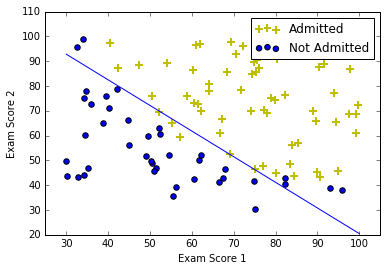

In [12]:
# Step 6: Visualize with decision boundary
a = plt.scatter(dataset[pos]['exam score 1'],dataset[pos]['exam score 2'], marker = '+', c = 'y', linewidth = 2, s=60, label='Admitted')
b = plt.scatter(dataset[neg]['exam score 1'],dataset[neg]['exam score 2'], c = 'b', linewidth = 1, s=30, label = 'Not Admitted')
plt.xlabel('Exam Score 1')
plt.ylabel('Exam Score 2')
plt.legend()
plt.xlim(25,105)
plt.ylim(20,110)

w = regr.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 100)
yy = a * xx - (regr.intercept_[0]) / w[1]
plt.plot(xx, yy)